In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report
from keras.applications.densenet import DenseNet121
from keras.layers import Dense

In [2]:
(x_train,y_train),(x_test,y_test)=cifar10.load_data()

In [3]:
x_train.shape,y_train.shape

((50000, 32, 32, 3), (50000, 1))

In [4]:
x_test.shape,x_test.shape

((10000, 32, 32, 3), (10000, 32, 32, 3))

In [3]:
classes=["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [6]:
def show_image_per_category():
    images_per_category = {label: None for label in classes}

    for i in range(10):
        idx = np.where(y_train == i)[0][0]
        images_per_category[classes[i]] = x_train[idx]

    fig, axes = plt.subplots(2, 5, figsize=(15, 7))
    for i, (label, image) in enumerate(images_per_category.items()):
        ax = axes[i // 5, i % 5]
        ax.imshow(image)
        ax.set_title(label)
        ax.axis('off')

    plt.show()

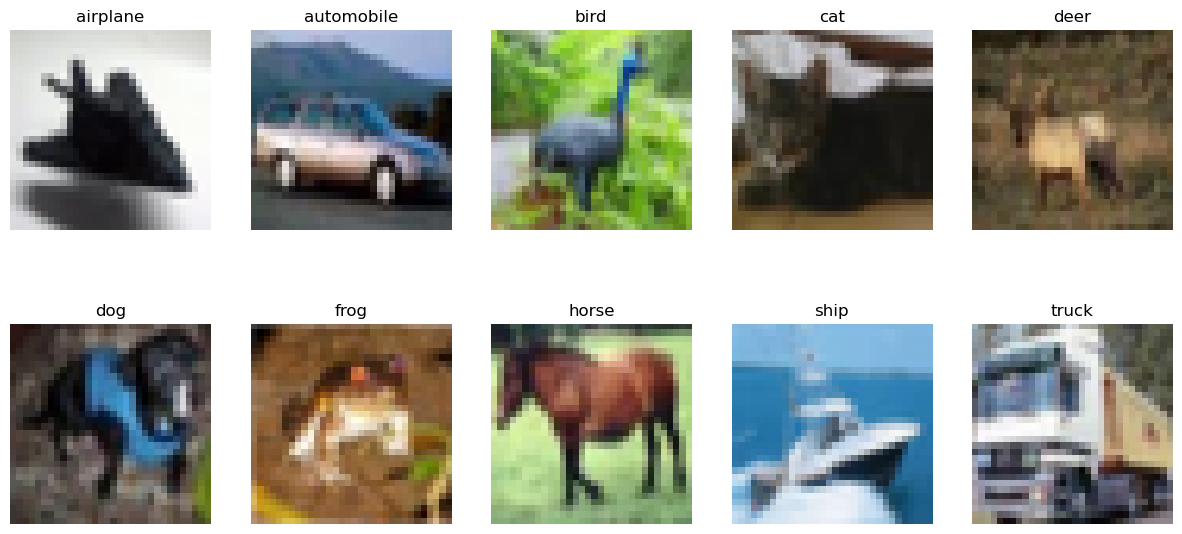

In [7]:
show_image_per_category()

Text(0.5, 1.0, 'Class distribution in training set')

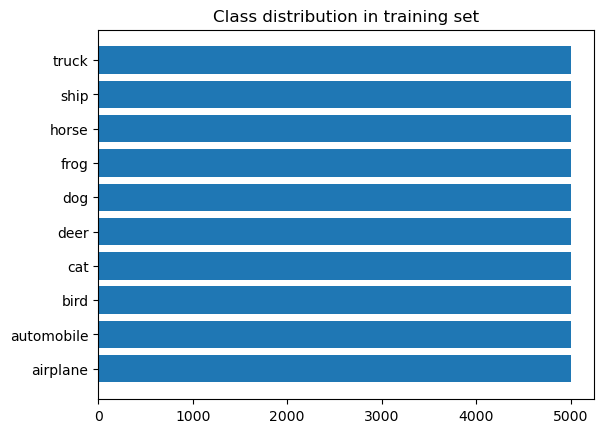

In [8]:
clas, counts = np.unique(y_train, return_counts=True)
plt.barh(classes, counts)
plt.title('Class distribution in training set')

Text(0.5, 1.0, 'Class distribution in testing set')

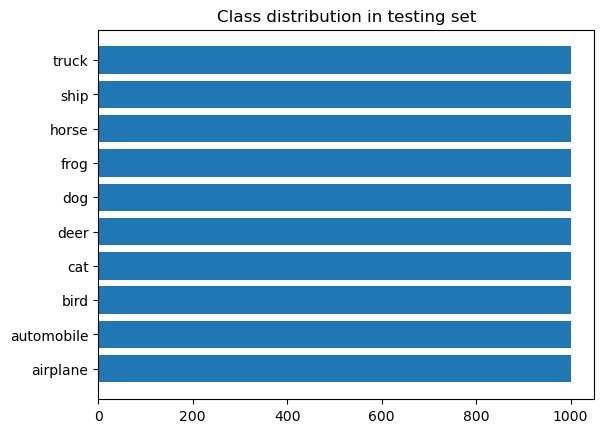

In [9]:
clas, counts = np.unique(y_test, return_counts=True)
plt.barh(classes, counts)
plt.title('Class distribution in testing set')

In [4]:
x_train=x_train/255
x_test=x_test/255

y_cat_train = to_categorical(y_train, 10)
y_cat_test = to_categorical(y_test, 10)

In [5]:
gen = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
train_gen = gen.flow(x_train, y_cat_train, batch_size=32)

In [12]:
model=Sequential([
    Flatten(input_shape=(32,32,3)),
    Dense(3000,activation='relu'),
    Dense(1000,activation='relu'),
    Dense(10,activation='softmax')
])

C:\Anaconda\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [13]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 3072)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 3000)                │       9,219,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1000)                │       3,001,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │          10,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,230,010 (46.65 MB)

 Trainable params: 12,230,010 (46.65 MB)

 Non-trainable params: 0 (0.00 B)

In [16]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [17]:
t_m=model.fit(train_gen,epochs=10,validation_data=(x_test,y_cat_test))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 135s 86ms/step - accuracy: 0.3090 - loss: 1.8972 - val_accuracy: 0.3782 - val_loss: 1.7139
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 134s 86ms/step - accuracy: 0.3673 - loss: 1.7558 - val_accuracy: 0.3959 - val_loss: 1.6591
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 135s 86ms/step - accuracy: 0.3904 - loss: 1.6905 - val_accuracy: 0.4199 - val_loss: 1.6239
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 134s 86ms/step - accuracy: 0.4016 - loss: 1.6627 - val_accuracy: 0.4117 - val_loss: 1.6437
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 135s 87ms/step - accuracy: 0.4098 - loss: 1.6345 - val_accuracy: 0.4424 - val_loss: 1.5821
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 135s 86ms/step - accuracy: 0.4171 - loss: 1.6159 - val_accuracy: 0.4409 - val_loss: 1.5555
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 134s 86ms/step - accuracy: 0.4297 - loss: 1.5859 - val_accuracy: 0.4477 - val_loss: 1.5437
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 134s 85ms/step - accuracy: 

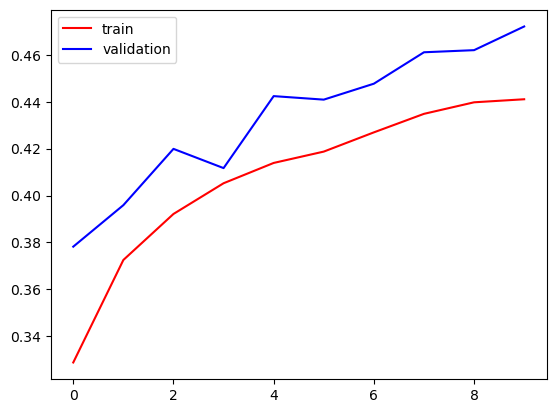

In [18]:
plt.plot(t_m.history['accuracy'],color='red',label='train')
plt.plot(t_m.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

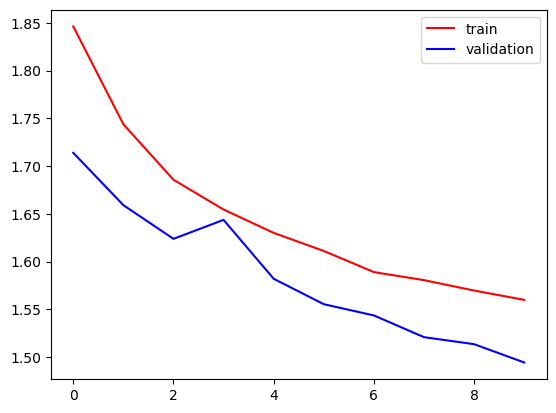

In [19]:
plt.plot(t_m.history['loss'],color='red',label='train')
plt.plot(t_m.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

 Image 100 is [8]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
The model predict that image 100 is 9


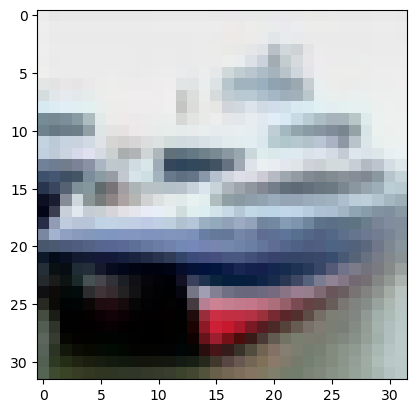

In [20]:
my_image = x_test[1]
plt.imshow(my_image)

print(f" Image 100 is {y_test[1]}")

pred_100 = np.argmax(model.predict(my_image.reshape(1, 32, 32, 3)))
print(f"The model predict that image 100 is {pred_100}")

 Image 100 is [1]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
The model predict that image 100 is 3


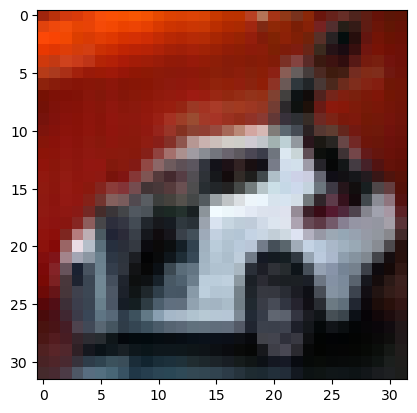

In [57]:
my_image = x_test[6]
plt.imshow(my_image)


print(f" Image 100 is {y_test[6]}")


pred_100 = np.argmax(model.predict(my_image.reshape(1, 32, 32, 3)))
print(f"The model predict that image 100 is {pred_100}")

In [23]:
y_pred=model.predict(x_test)
y_pred_c=[np.argmax(element) for element in y_pred]
print("classification report", classification_report(y_test,y_pred_c))

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
classification report               precision    recall  f1-score   support

           0       0.59      0.46      0.52      1000
           1       0.48      0.70      0.57      1000
           2       0.36      0.37      0.37      1000
           3       0.34      0.33      0.33      1000
           4       0.45      0.36      0.40      1000
           5       0.40      0.38      0.39      1000
           6       0.50      0.48      0.49      1000
           7       0.53      0.52      0.53      1000
           8       0.54      0.70      0.61      1000
           9       0.57      0.42      0.49      1000

    accuracy                           0.47     10000
   macro avg       0.47      0.47      0.47     10000
weighted avg       0.47      0.47      0.47     10000



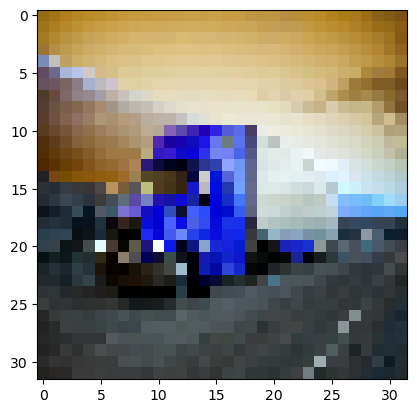

In [24]:
img=cv2.imread('t.jpg')
img=cv2.resize(img,(32,32))
plt.imshow(img)

In [25]:
pred_i = np.argmax(model.predict(img.reshape(1, 32, 32, 3)))
pred_i

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


1

In [26]:
model_cnn = Sequential()


model_cnn.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=(32,32,3), activation='relu', padding='same'))
model_cnn.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=(32,32,3), activation='relu', padding='same'))
model_cnn.add(MaxPool2D(pool_size=(2, 2)))


model_cnn.add(Conv2D(filters=64, kernel_size=(3,3), input_shape=(32,32,3), activation='relu', padding='same'))
model_cnn.add(Conv2D(filters=64, kernel_size=(3,3), input_shape=(32,32,3), activation='relu', padding='same'))
model_cnn.add(MaxPool2D(pool_size=(2, 2)))


model_cnn.add(Conv2D(filters=128, kernel_size=(3,3), input_shape=(32,32,3), activation='relu', padding='same'))
model_cnn.add(Conv2D(filters=128, kernel_size=(3,3), input_shape=(32,32,3), activation='relu', padding='same'))
model_cnn.add(MaxPool2D(pool_size=(2, 2)))


model_cnn.add(Flatten())
model_cnn.add(Dense(256, activation='relu'))
model_cnn.add(Dense(128, activation='relu'))
model_cnn.add(Dense(10, activation='softmax'))

C:\Anaconda\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [27]:
model_cnn.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 32, 32, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 16, 16, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 8, 8, 128)           │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 256)                 │         524,544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 845,738 (3.23 MB)

 Trainable params: 845,738 (3.23 MB)

 Non-trainable params: 0 (0.00 B)

In [28]:
model_cnn.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [29]:
t_mc=model_cnn.fit(train_gen, epochs=30,validation_data=(x_test, y_cat_test))

Epoch 1/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 59s 36ms/step - accuracy: 0.3115 - loss: 1.8360 - val_accuracy: 0.5439 - val_loss: 1.2565
Epoch 2/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 55s 35ms/step - accuracy: 0.5476 - loss: 1.2569 - val_accuracy: 0.5942 - val_loss: 1.1439
Epoch 3/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 55s 35ms/step - accuracy: 0.6265 - loss: 1.0457 - val_accuracy: 0.6728 - val_loss: 0.9403
Epoch 4/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 55s 35ms/step - accuracy: 0.6708 - loss: 0.9356 - val_accuracy: 0.6826 - val_loss: 0.9109
Epoch 5/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 55s 35ms/step - accuracy: 0.7064 - loss: 0.8376 - val_accuracy: 0.7266 - val_loss: 0.7902
Epoch 6/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 55s 35ms/step - accuracy: 0.7239 - loss: 0.7855 - val_accuracy: 0.7251 - val_loss: 0.8056
Epoch 7/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 55s 35ms/step - accuracy: 0.7453 - loss: 0.7283 - val_accuracy: 0.7371 - val_loss: 0.7704
Epoch 8/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 55s 35ms/step - accuracy: 0.7591 -

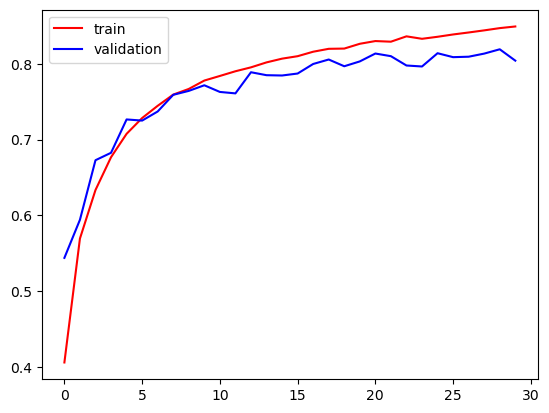

In [30]:
plt.plot(t_mc.history['accuracy'],color='red',label='train')
plt.plot(t_mc.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

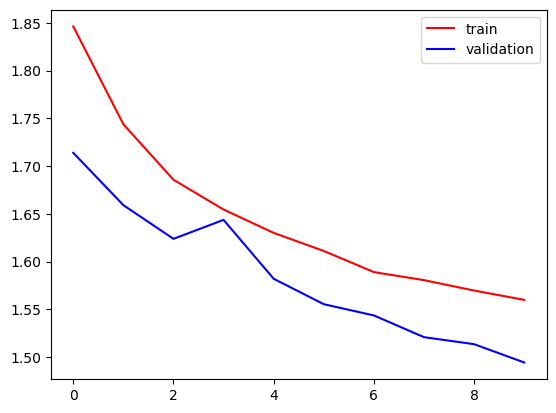

In [31]:
plt.plot(t_m.history['loss'],color='red',label='train')
plt.plot(t_m.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [32]:
y_pred = model_cnn.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step


In [33]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.83      0.84      1000
           1       0.92      0.90      0.91      1000
           2       0.87      0.62      0.72      1000
           3       0.74      0.57      0.64      1000
           4       0.83      0.73      0.77      1000
           5       0.70      0.77      0.73      1000
           6       0.69      0.93      0.79      1000
           7       0.79      0.88      0.83      1000
           8       0.91      0.89      0.90      1000
           9       0.80      0.93      0.86      1000

    accuracy                           0.80     10000
   macro avg       0.81      0.80      0.80     10000
weighted avg       0.81      0.80      0.80     10000



 Image 100 is [6]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
The model predict that image 100 is 6


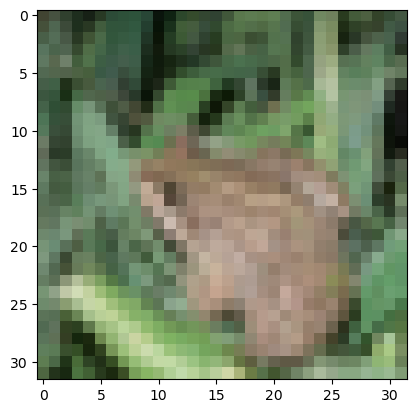

In [34]:
my_image = x_test[4]
plt.imshow(my_image)


print(f" Image 100 is {y_test[4]}")


pred_100 = np.argmax(model_cnn.predict(my_image.reshape(1, 32, 32, 3)))
print(f"The model predict that image 100 is {pred_100}")

 Image 100 is [3]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
The model predict that image 100 is 3


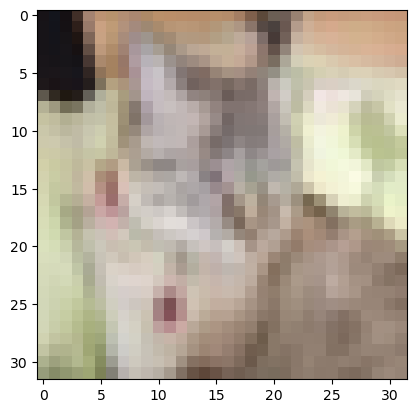

In [35]:
my_image = x_test[8]
plt.imshow(my_image)


print(f" Image 100 is {y_test[8]}")


pred_100 = np.argmax(model_cnn.predict(my_image.reshape(1, 32, 32, 3)))
print(f"The model predict that image 100 is {pred_100}")

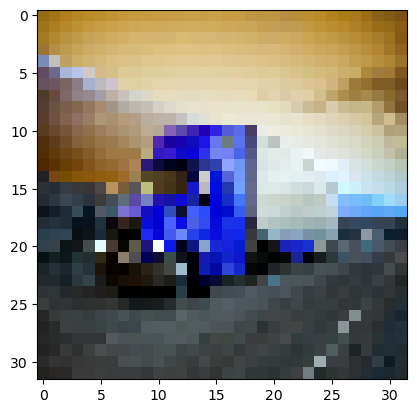

In [36]:
img=cv2.imread('t.jpg')
img=cv2.resize(img,(32,32))
plt.imshow(img)

In [37]:
pred_i = np.argmax(model_cnn.predict(img.reshape(1, 32, 32, 3)))
pred_i

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


9

In [38]:
model_cnnb = Sequential()


model_cnnb.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=(32,32,3), activation='relu', padding='same'))
model_cnnb.add(BatchNormalization())
model_cnnb.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=(32,32,3), activation='relu', padding='same'))
model_cnnb.add(BatchNormalization())
model_cnnb.add(MaxPool2D(pool_size=(2, 2)))
model_cnnb.add(Dropout(0.25))


model_cnnb.add(Conv2D(filters=64, kernel_size=(3,3), input_shape=(32,32,3), activation='relu', padding='same'))
model_cnnb.add(BatchNormalization())
model_cnnb.add(Conv2D(filters=64, kernel_size=(3,3), input_shape=(32,32,3), activation='relu', padding='same'))
model_cnnb.add(BatchNormalization())
model_cnnb.add(MaxPool2D(pool_size=(2, 2)))
model_cnnb.add(Dropout(0.25))


model_cnnb.add(Conv2D(filters=128, kernel_size=(3,3), input_shape=(32,32,3), activation='relu', padding='same'))
model_cnnb.add(BatchNormalization())
model_cnnb.add(Conv2D(filters=128, kernel_size=(3,3), input_shape=(32,32,3), activation='relu', padding='same'))
model_cnnb.add(BatchNormalization())
model_cnnb.add(MaxPool2D(pool_size=(2, 2)))
model_cnnb.add(Dropout(0.25))


model_cnnb.add(Flatten())

model_cnnb.add(Dense(128, activation='relu'))
model_cnnb.add(Dropout(0.25))
model_cnnb.add(Dense(10, activation='softmax'))

C:\Anaconda\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [39]:
model_cnnb.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 32, 32, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 16, 16, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 8, 8, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 8, 8, 128)           │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 8, 8, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 552,362 (2.11 MB)

 Trainable params: 551,466 (2.10 MB)

 Non-trainable params: 896 (3.50 KB)

In [40]:
model_cnnb.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [42]:
t_mcb=model_cnnb.fit(train_gen, epochs=30,validation_data=(x_test, y_cat_test))

Epoch 1/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 104s 66ms/step - accuracy: 0.3553 - loss: 1.7668 - val_accuracy: 0.5619 - val_loss: 1.2276
Epoch 2/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 101s 65ms/step - accuracy: 0.5369 - loss: 1.2902 - val_accuracy: 0.6375 - val_loss: 1.0377
Epoch 3/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 102s 65ms/step - accuracy: 0.6292 - loss: 1.0744 - val_accuracy: 0.6981 - val_loss: 0.8959
Epoch 4/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 101s 65ms/step - accuracy: 0.6703 - loss: 0.9574 - val_accuracy: 0.6838 - val_loss: 0.9541
Epoch 5/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 105s 67ms/step - accuracy: 0.7029 - loss: 0.8643 - val_accuracy: 0.7136 - val_loss: 0.8471
Epoch 6/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 102s 65ms/step - accuracy: 0.7225 - loss: 0.8178 - val_accuracy: 0.7737 - val_loss: 0.6693
Epoch 7/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 102s 65ms/step - accuracy: 0.7415 - loss: 0.7577 - val_accuracy: 0.7769 - val_loss: 0.6601
Epoch 8/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 102s 65ms/step - accuracy: 

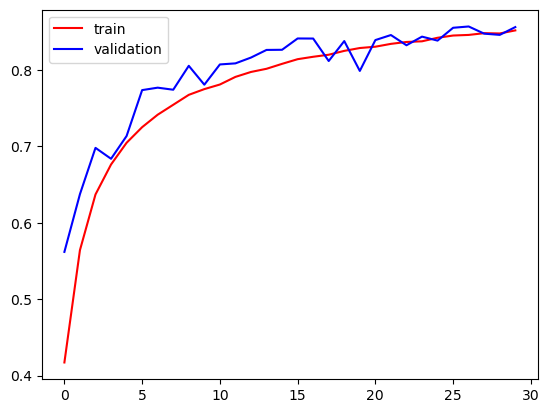

In [43]:
plt.plot(t_mcb.history['accuracy'],color='red',label='train')
plt.plot(t_mcb.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

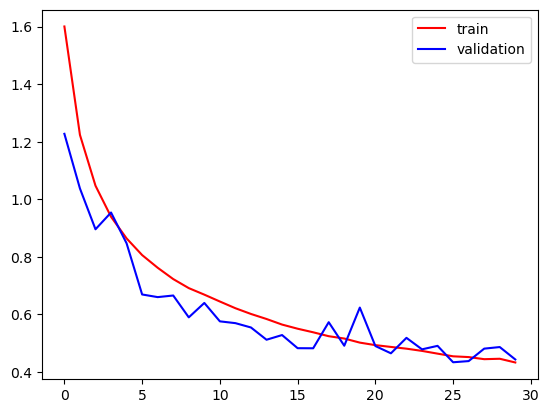

In [44]:
plt.plot(t_mcb.history['loss'],color='red',label='train')
plt.plot(t_mcb.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [45]:
y_pred = model_cnnb.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step


In [47]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.87      0.87      1000
           1       0.92      0.95      0.94      1000
           2       0.84      0.78      0.81      1000
           3       0.84      0.60      0.70      1000
           4       0.79      0.88      0.84      1000
           5       0.83      0.77      0.80      1000
           6       0.75      0.95      0.84      1000
           7       0.93      0.89      0.91      1000
           8       0.92      0.94      0.93      1000
           9       0.90      0.92      0.91      1000

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.85     10000
weighted avg       0.86      0.86      0.85     10000



 Image 100 is [1]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
The model predict that image 100 is 1


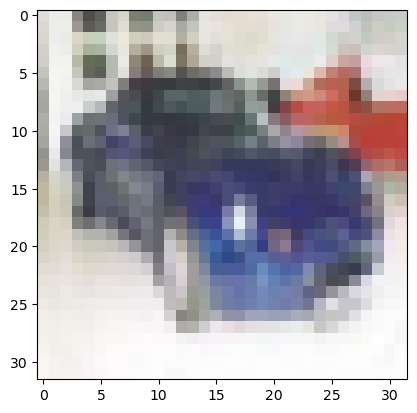

In [56]:
my_image = x_test[134]
plt.imshow(my_image)


print(f" Image 100 is {y_test[134]}")


pred_100 = np.argmax(model_cnnb.predict(my_image.reshape(1, 32, 32, 3)))
print(f"The model predict that image 100 is {pred_100}")

 Image 100 is [7]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
The model predict that image 100 is 7


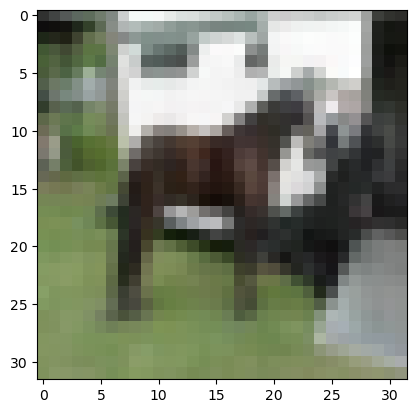

In [58]:
my_image = x_test[20]
plt.imshow(my_image)


print(f" Image 100 is {y_test[20]}")


pred_100 = np.argmax(model_cnnb.predict(my_image.reshape(1, 32, 32, 3)))
print(f"The model predict that image 100 is {pred_100}")

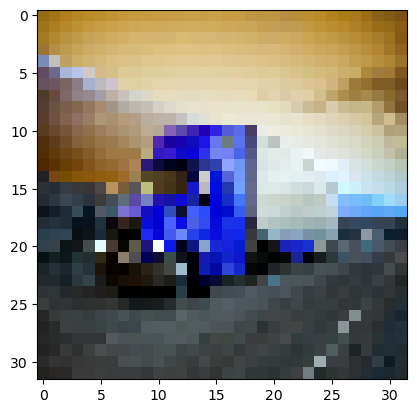

In [59]:
img=cv2.imread('t.jpg')
img=cv2.resize(img,(32,32))
plt.imshow(img)

In [60]:
pred_i = np.argmax(model_cnn.predict(img.reshape(1, 32, 32, 3)))
pred_i

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


9

In [6]:
model_d = Sequential()
base_model = DenseNet121(input_shape=(32, 32, 3), include_top=False, weights='imagenet', pooling='avg')
model_d.add(base_model)
model_d.add(Dense(10, activation='softmax'))

In [7]:
model_d.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ densenet121 (Functional)             │ ?                           │       7,037,504 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,037,504 (26.85 MB)

 Trainable params: 6,953,856 (26.53 MB)

 Non-trainable params: 83,648 (326.75 KB)

In [8]:
model_d.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [9]:
t_md = model_d.fit(train_gen, epochs=20,validation_data=(x_test, y_cat_test))

Epoch 1/20


C:\Anaconda\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 493s 278ms/step - accuracy: 0.4876 - loss: 1.5210 - val_accuracy: 0.4021 - val_loss: 1.8651
Epoch 2/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 417s 267ms/step - accuracy: 0.5887 - loss: 1.2044 - val_accuracy: 0.2022 - val_loss: 62.8187
Epoch 3/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 415s 266ms/step - accuracy: 0.5923 - loss: 1.1755 - val_accuracy: 0.6411 - val_loss: 1.0471
Epoch 4/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 418s 267ms/step - accuracy: 0.6972 - loss: 0.8964 - val_accuracy: 0.1174 - val_loss: 648.4219
Epoch 5/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 417s 267ms/step - accuracy: 0.4077 - loss: 1.7063 - val_accuracy: 0.6221 - val_loss: 1.0821
Epoch 6/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 419s 268ms/step - accuracy: 0.5218 - loss: 1.3957 - val_accuracy: 0.5365 - val_loss: 2.2902
Epoch 7/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 421s 270ms/step - accuracy: 0.5524 - loss: 1.2973 - val_accuracy: 0.5855 - val_loss: 1.6737
Epoch 8/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 423s 271ms/step - accuracy: 

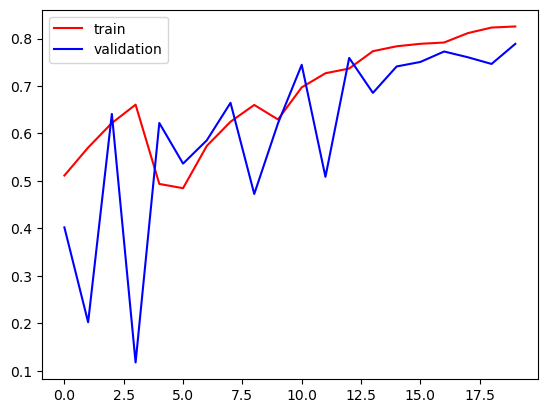

In [10]:
plt.plot(t_md.history['accuracy'],color='red',label='train')
plt.plot(t_md.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

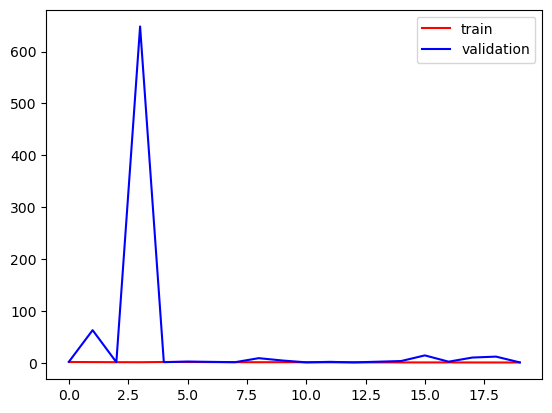

In [11]:
plt.plot(t_md.history['loss'],color='red',label='train')
plt.plot(t_md.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [12]:
y_pred = model_d.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 30s 85ms/step


In [13]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.81      0.82      1000
           1       0.80      0.80      0.80      1000
           2       0.73      0.81      0.77      1000
           3       0.71      0.60      0.65      1000
           4       0.87      0.75      0.81      1000
           5       0.76      0.71      0.74      1000
           6       0.83      0.86      0.85      1000
           7       0.91      0.82      0.86      1000
           8       0.90      0.76      0.82      1000
           9       0.65      0.96      0.78      1000

    accuracy                           0.79     10000
   macro avg       0.80      0.79      0.79     10000
weighted avg       0.80      0.79      0.79     10000



 Image 100 is [1]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
The model predict that image 100 is 1


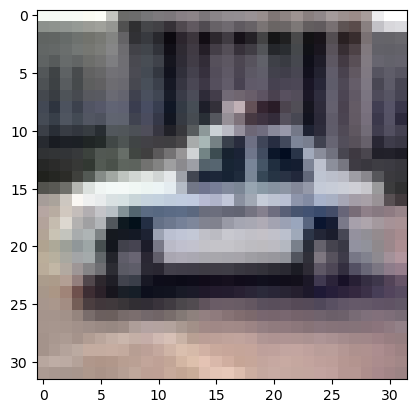

In [14]:
my_image = x_test[104]
plt.imshow(my_image)


print(f" Image 100 is {y_test[104]}")


pred_100 = np.argmax(model_d.predict(my_image.reshape(1, 32, 32, 3)))
print(f"The model predict that image 100 is {pred_100}")

 Image 100 is [3]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
The model predict that image 100 is 3


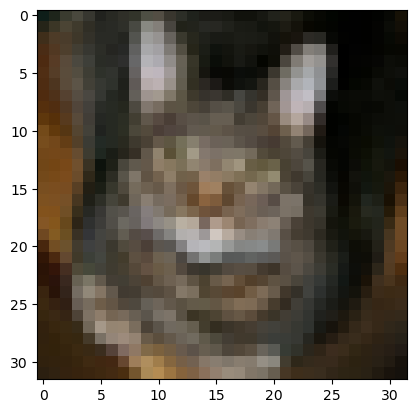

In [15]:
my_image = x_test[1894]
plt.imshow(my_image)


print(f" Image 100 is {y_test[1894]}")


pred_100 = np.argmax(model_d.predict(my_image.reshape(1, 32, 32, 3)))
print(f"The model predict that image 100 is {pred_100}")

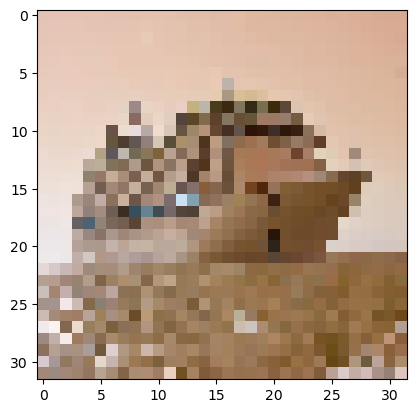

In [16]:
img=cv2.imread('s.jpeg')
img=cv2.resize(img,(32,32))
plt.imshow(img)

In [17]:
pred_i = np.argmax(model_d.predict(img.reshape(1, 32, 32, 3)))
pred_i

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


8